In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.linalg as linalg
from torchviz import make_dot
import graphviz                  

In [2]:
#Defines Network Class
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        #This defines 3 linear transformations
        #and Sigmoid activation function
        self.layer1 = nn.Linear(2,2)
        self.layer2 = nn.Linear(2,3)
        self.layer3 = nn.Linear(3,2)
        self.activate = nn.Sigmoid()

    #Defines forward pass
    def forward(self, x):
        x = self.layer1(x) #between each layer we first apply Wx + b
        x = self.activate(x) #then take sigmoid(Wx+b)
        x = self.layer2(x)
        x = self.activate(x)
        x = self.layer3(x)
        x = self.activate(x)
        return x

In [3]:
#Defines the norm squared cost function
def nrm_sqr_cost(predictions, expected):
    return (linalg.vector_norm(predictions-expected)**2)
def cost_tl(predictions,expected):
    return torch.sum(linalg.vector_norm(predictions-expected, dim=0)**2)

In [4]:
#Set seed and enter training data
torch.manual_seed(0)
xt = torch.tensor([[0.1, 0.3, 0.1, 0.6, 0.4, 0.6, 0.5, 0.9, 0.4, 0.7],
               [0.1, 0.4, 0.5, 0.9, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6]])
yt = torch.tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

In [201]:
#instantiate the network and optimizer
network = net()
optimizer = optim.SGD(network.parameters(), lr = .05)

#This code shows the parameters
#par_list = list(network.parameters())
#print(par_list)

In [202]:
#Train the model
iters = int(1e6)

for i in range(iters):
    #pick Random Data point
    index = torch.randint(0,10, (1,)).item()
    x = xt[:,index].unsqueeze(0)
    y = yt[:,index].unsqueeze(0)

    #forward
    prediction = network(x)
    cost = nrm_sqr_cost(prediction, y)

    #backward
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if i % 1000 == 0:
        with torch.no_grad():
            total_prediction = network(xt.transpose(0,1))
        total_cost = cost_tl(total_prediction, yt.transpose(0,1))
        print(f'{100*(i/iters)} % complete, cost = {total_cost}')
        
#Save parameters 
torch.save(network.state_dict(), 'model_11-19-24_parameters.pth')

0.0 % complete, cost = 5.14926815032959
0.1 % complete, cost = 5.008049011230469
0.2 % complete, cost = 5.001182556152344
0.3 % complete, cost = 5.001875877380371
0.4 % complete, cost = 5.008444786071777
0.5 % complete, cost = 5.031551361083984
0.6 % complete, cost = 5.068052291870117
0.7000000000000001 % complete, cost = 5.032102584838867
0.8 % complete, cost = 5.007707595825195
0.8999999999999999 % complete, cost = 5.027561187744141
1.0 % complete, cost = 4.9976935386657715
1.0999999999999999 % complete, cost = 5.009377479553223
1.2 % complete, cost = 5.006093978881836
1.3 % complete, cost = 5.064636707305908
1.4000000000000001 % complete, cost = 5.026140213012695
1.5 % complete, cost = 5.018901824951172
1.6 % complete, cost = 5.016490936279297
1.7000000000000002 % complete, cost = 4.99249267578125
1.7999999999999998 % complete, cost = 5.00867223739624
1.9 % complete, cost = 4.956867694854736
2.0 % complete, cost = 4.925671577453613
2.1 % complete, cost = 4.819551467895508
2.19999999

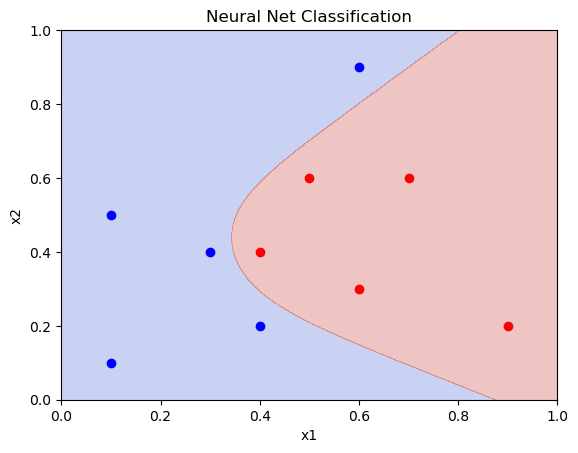

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Create grid
x_vals = np.linspace(0, 1, 1000)
y_vals = np.linspace(0, 1, 1000)
xx, yy = np.meshgrid(x_vals, y_vals)
grid_points = np.vstack([xx.ravel(), yy.ravel()])

# Classify all grid points
grid_tensor = torch.from_numpy(grid_points.T).float()
with torch.no_grad():
    predictions = network(grid_tensor) 
predictions = torch.argmax(predictions, dim=1).numpy()
predictions = predictions.reshape(xx.shape)

# Plot classification regions
plt.contourf(xx, yy, predictions, alpha=0.3, cmap="coolwarm")

# Training data
xt = np.array([[0.1, 0.3, 0.1, 0.6, 0.4, 0.6, 0.5, 0.9, 0.4, 0.7],
               [0.1, 0.4, 0.5, 0.9, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6]])
yt = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])  # Simplified labels

# Plot training points
for i, (x, y) in enumerate(zip(xt[0], xt[1])):
    if yt[i] == 0:
        plt.plot(x, y, 'ro')  # Class 0: red
    else:
        plt.plot(x, y, 'bo')  # Class 1: blue

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Neural Net Classification")
plt.show()


In [5]:
network = net()
network.load_state_dict(torch.load('model_11-19-24_parameters.pth', weights_only=True))
network.eval()

net(
  (layer1): Linear(in_features=2, out_features=2, bias=True)
  (layer2): Linear(in_features=2, out_features=3, bias=True)
  (layer3): Linear(in_features=3, out_features=2, bias=True)
  (activate): Sigmoid()
)

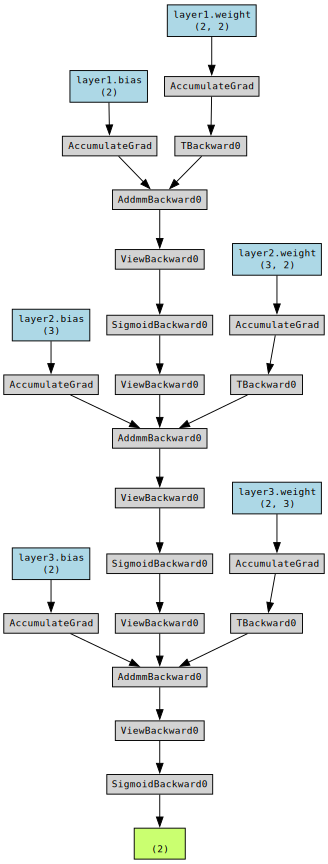

In [6]:
x = torch.tensor([1,2]).float()
output = network(x)
make_dot(output, params=dict(list(network.named_parameters())))

# Visualize the computational graph
#make_dot(output, params=dict(network.named_parameters())).render("model_graph", format="png")
